## Packages

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotnine import (ggplot, aes, geom_line, geom_point, 
                     theme_bw, theme, element_text, labs, theme_classic)


In [8]:
root_path = "../../Data/GoogleDrive/MLP_Results/"
result_2 = pd.read_parquet(root_path + "test_results_lego_2-Under_Sample_1:1_threshold_20.parquet")
result_3 = pd.read_parquet(root_path + "test_results_best_lego_3-Under_Sample_1:1_threshold_20.parquet")
result_4 = pd.read_parquet(root_path + "test_results_best_lego_4-Under_Sample_1:1_threshold_20.parquet")
result_5 = pd.read_parquet(root_path + "test_results_best_lego_5-Under_Sample_1:1_threshold_20.parquet")
result_6 = pd.read_parquet(root_path + "test_results_best_lego_6-Under_Sample_1:1_threshold_20.parquet")
result_7 = pd.read_parquet(root_path + "test_results_best_lego_7-Under_Sample_1:1_threshold_20.parquet")
result_8 = pd.read_parquet(root_path + "test_results_best_lego_8-Under_Sample_1:1_threshold_20.parquet")
result_9 = pd.read_parquet(root_path + "test_results_best_lego_9-Under_Sample_1:1_threshold_20.parquet")

In [53]:
# put all results in a dataframe
results = pd.concat([result_2, result_3, result_4, result_5, result_6, result_7, result_8, result_9])
results.reset_index(drop=True, inplace=True)

In [55]:
results['step'] = results.index + 1

In [56]:
results

,Dataset_Name,Grid_Variable,Parameters,Recall,ROC_AUC,Accuracy,Fit_Time,step
0,Under_Sample_1:1_threshold_20,_lego_2,"{'hidden_layer_sizes': [47, 46, 46, 46], 'solv...",0.721486,0.788470,0.740800,347.986998,1
1,Under_Sample_1:1_threshold_20,_best_lego_3,"{'activation': 'relu', 'hidden_layer_sizes': [...",0.717809,0.789987,0.740573,344.890698,2
2,Under_Sample_1:1_threshold_20,_best_lego_4,"{'activation': 'relu', 'hidden_layer_sizes': [...",0.828418,0.814961,0.677817,144.550358,3
3,Under_Sample_1:1_threshold_20,_best_lego_5,"{'activation': 'relu', 'hidden_layer_sizes': [...",0.829797,0.813188,0.675870,147.607035,4
4,Under_Sample_1:1_threshold_20,_best_lego_6,"{'activation': 'relu', 'hidden_layer_sizes': [...",0.818767,0.809611,0.684131,140.586046,5
5,Under_Sample_1:1_threshold_20,_best_lego_7,"{'activation': 'relu', 'batch_size': 'auto', '...",0.830640,0.814195,0.679791,161.261473,6
6,Under_Sample_1:1_threshold_20,_best_lego_8,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.804443,0.810478,0.693629,144.629535,7
7,Under_Sample_1:1_threshold_20,_best_lego_9,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.817082,0.813559,0.686287,154.787499,8


### Expected input 

A dataframe with the following columns:
- `model`: the name of the model used 
- `parameters`: the parameters used in the grid search
- `test_score`: the test score of the best CV model (which will be recall


In [39]:
# synthetic data created to test the plotting functions
# generate test scores from tuning the hyperparameters for the MLP model
# the test scores are around 70 - 80

scores = pd.DataFrame({
    'model_name': ['MLP'] * 10,
    'hyperparameters': ['hidden_layer_sizes', 'activation', 'solver', 'alpha', 
                        'batch_size', 'learning_rate', 'max_iter', 'early_stopping', 
                        'validation_fraction', 'beta_1'],
    'test_score': np.random.randint(70, 80, 10)
})

# sort by test score
scores = scores.sort_values('test_score', ascending=True)

baseline = pd.DataFrame({
    'model_name': ['MLP'],
    'hyperparameters': ['baseline'],
    'test_score': [np.random.randint(70, 80)],
})

scores = pd.concat([baseline, scores], ignore_index=True)

scores.head(10)

,model_name,hyperparameters,test_score
0,MLP,baseline,75
1,MLP,beta_1,70
2,MLP,solver,71
3,MLP,alpha,71
4,MLP,activation,72
5,MLP,max_iter,73
6,MLP,early_stopping,73
7,MLP,validation_fraction,76
8,MLP,batch_size,77
9,MLP,learning_rate,77


In [41]:
# add a column to indicate the step number
scores['step'] = range(1, 12)


## Tuning Parameters

- binary parameter tuning: quick comparison of two values
- continuous parameter tuning: line plot
- multiple continuous parameters tuning: heatmap

### quick rundown of what the error analysis plot looks like 

- X-axis: Displays different parameter combinations as strings, representing the values of hidden_layer_sizes and alpha. Each point on the axis corresponds to a specific combination, like {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}.

- Y-axis: Shows the mean cross-validation accuracy for each parameter setting. The scale depends on the accuracy scores obtained, typically ranging from 0 to 1.

- Error bars: Each point has an error bar that represents the standard deviation of the accuracy across the cross-validation folds. This gives an idea of the variability or stability of the model's performance with those specific parameters.

- Markers: Each parameter combination is represented by a circle ('o' marker) on the plot.

- Legend: The legend includes entries for each parameter setting, making it easier to identify which parameters correspond to each point on the plot.

(0.7, 0.8)

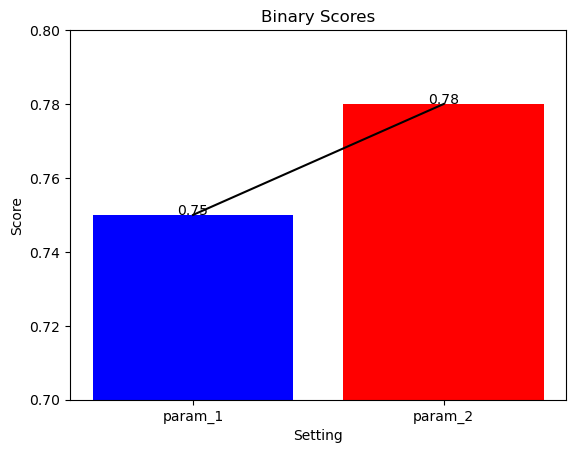

In [8]:
# for binary 
bi_score = [0.75, 0.78]
# bar plot for binary
plt.bar(['param_1', 'param_2'], bi_score, color = ['blue', 'red'])
# add line plot to show trend 
plt.plot(bi_score, color = 'black')
for i in range(2):
    plt.text(i, bi_score[i], round(bi_score[i], 3), ha = 'center')
plt.title('Binary Scores')
plt.xlabel('Setting')
plt.ylabel('Score')
# adjust the y-axis
plt.ylim(0.7, 0.8)

## Entire Training Process

- table of metrics
- line plot to show the fluctuation of metrics from the baseline to the final model

### what the plot contains

- X-axis: Displays the number of iterations or epochs, representing the training progress from the start to the end.

- Y-axis: Shows the value of the metric being tracked, such as loss or accuracy. The scale depends on the metric values obtained, typically ranging from 0 to 1.

two options: 

1. 
- Lines: Each line represents a different metric, such as training loss, validation loss, training accuracy, or validation accuracy. The lines show how the metric changes over time during training.

- Legend: The legend includes entries for each metric, making it easier to identify which line corresponds to each metric.

2. 

- Line: A single line represents the metric being tracked, such as training loss, validation loss, training accuracy, or validation accuracy. The line shows how the metric changes over time during training.

- Line sections: Different sections of the line can be colored or styled differently to indicate different stages of training (aka different tuning parameters).

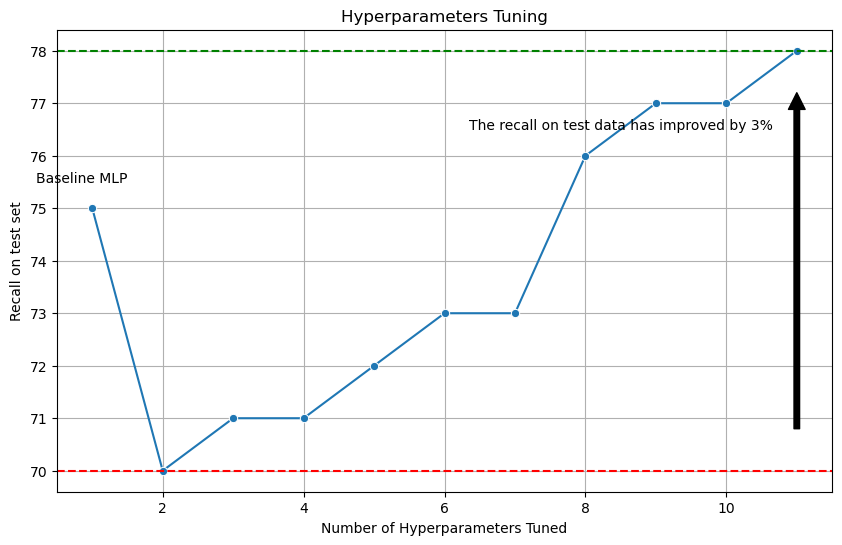

In [42]:
# option 2
def plot_hyperparameters_tuning(scores):

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='step', y='test_score', data=scores, marker='o')
    # add line for baseline
    plt.axhline(y=scores['test_score'].iloc[1], color='r', linestyle='--')
    # add line for final model
    plt.axhline(y=scores['test_score'].iloc[-1], color='g', linestyle='--')
    # add arrow to show improvement
    plt.annotate('', (scores['step'].iloc[-1], scores['test_score'].iloc[-1]), 
                 (scores['step'].iloc[-1], scores['test_score'].iloc[1]), 
                 arrowprops = dict(facecolor='black', shrink=0.1))
    # add text to show improvement in percentage
    plt.text(scores['step'].iloc[-3] - 0.5, 
             (scores['test_score'].iloc[-1] + scores['test_score'].iloc[0]) / 2, 
             f'The recall on test data has improved by {round(scores["test_score"].iloc[-1] - scores["test_score"].iloc[0], 2)}%', 
             ha='center')
    # point to the base model 
    plt.text(scores['step'].iloc[0] + 0.5, 
             scores['test_score'].iloc[0] + 0.5, 'Baseline MLP', ha='right')
    plt.title('Hyperparameters Tuning')
    plt.xlabel('Number of Hyperparameters Tuned')
    plt.ylabel('Recall on test set')
    #plt.xticks(rotation=35)
    plt.grid(True)
    plt.show()


plot_hyperparameters_tuning(scores)

Text(0, 0.5, 'Recall on test set')

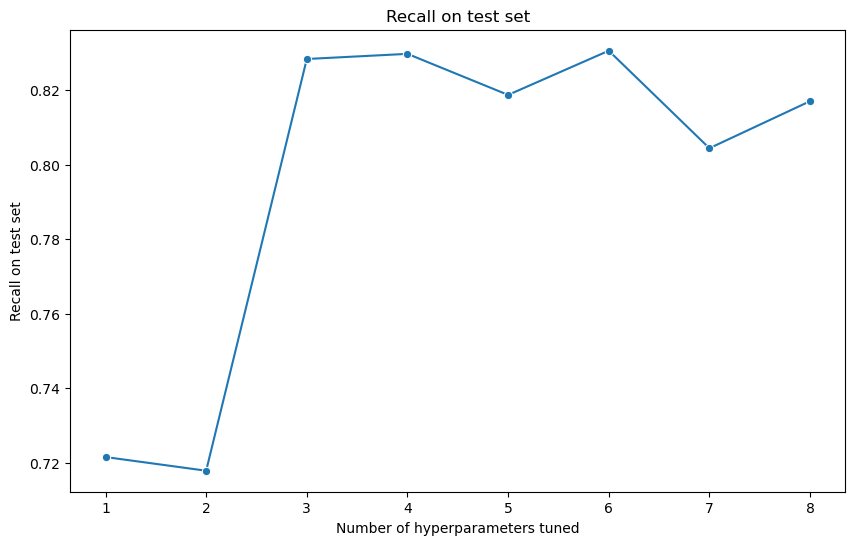

In [58]:
# plot the result
plt.figure(figsize=(10, 6))
sns.lineplot(x='step', y='Recall', data=results, marker='o')
plt.title('Recall on test set')
plt.xlabel('Number of hyperparameters tuned')
plt.ylabel('Recall on test set')

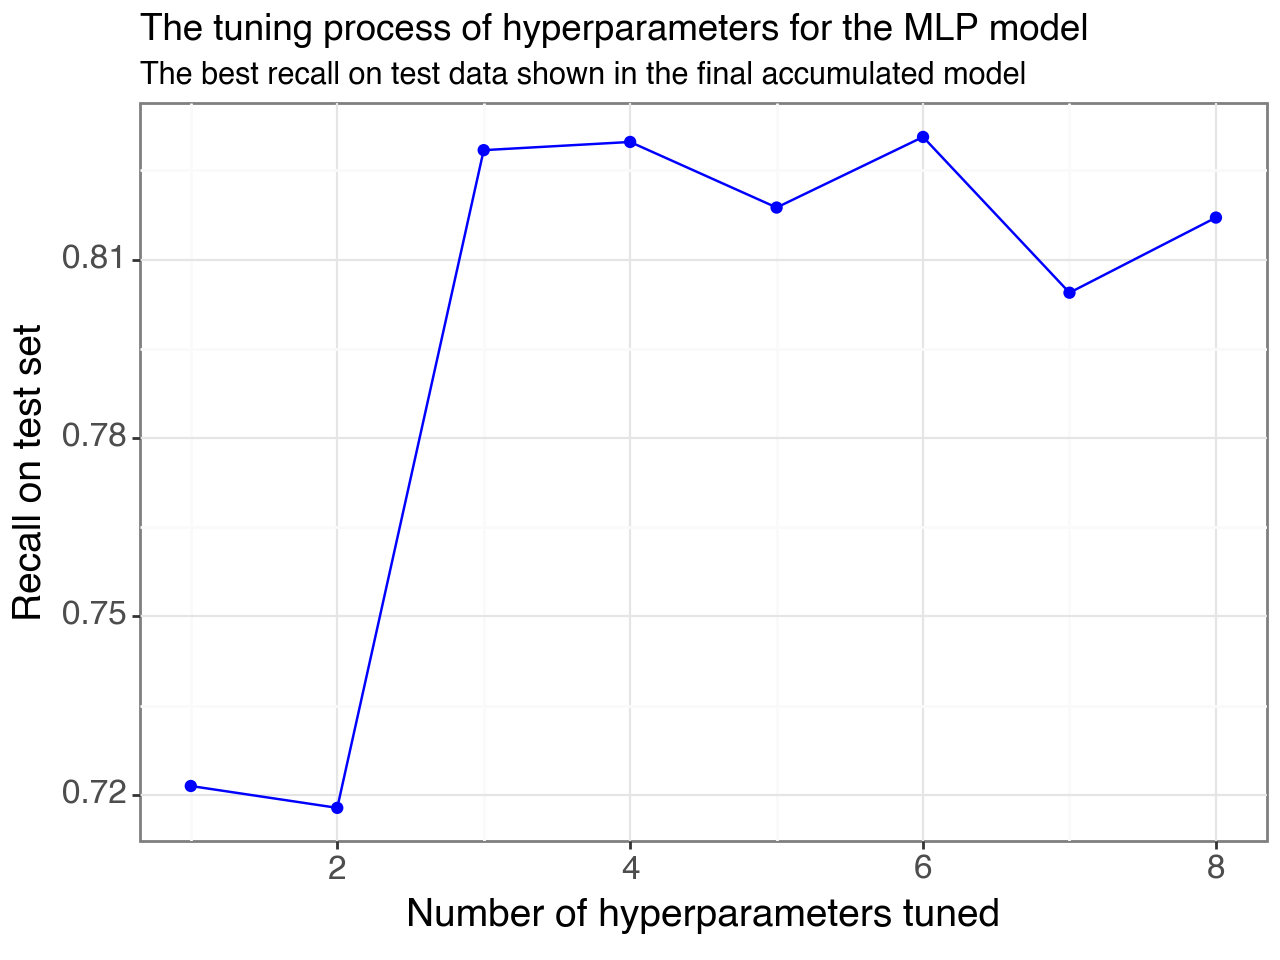

<Figure Size: (640 x 480)>

In [73]:
# use plotnine to plot the result
(ggplot() +
    aes(x='step', y='Recall') +
    geom_line(data=results, color='blue') +
    geom_point(data=results, color='blue') +
    # add title and labels
    labs(title='The tuning process of hyperparameters for the MLP model',
         subtitle='The best recall on test data shown in the final accumulated model',
         x='Number of hyperparameters tuned', 
         y='Recall on test set') +
    theme_bw() +
    theme(axis_text=element_text(size=12), 
          axis_title=element_text(size=14))
    
)


In [3]:
with open('/Users/hinnz/Documents/BIOSTAT212B/212B-ML-Project/assignment_3/local_dev/best_model_best_lego_5_2-Under_Sample_1:1_threshold_20.pkl', 'rb') as f:
    model = pickle.load(f)


/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [19]:
# import test data
test_data_y = pd.read_parquet('../../Data/GoogleDrive/MLP_Dataset/Under_Sample_1:1_threshold_20_y_test.parquet')
test_data_x = pd.read_parquet('../../Data/GoogleDrive/MLP_Dataset/Under_Sample_1:1_threshold_20_x_test.parquet')  

# predict on test data
y_pred = model.predict(test_data_x)

/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names


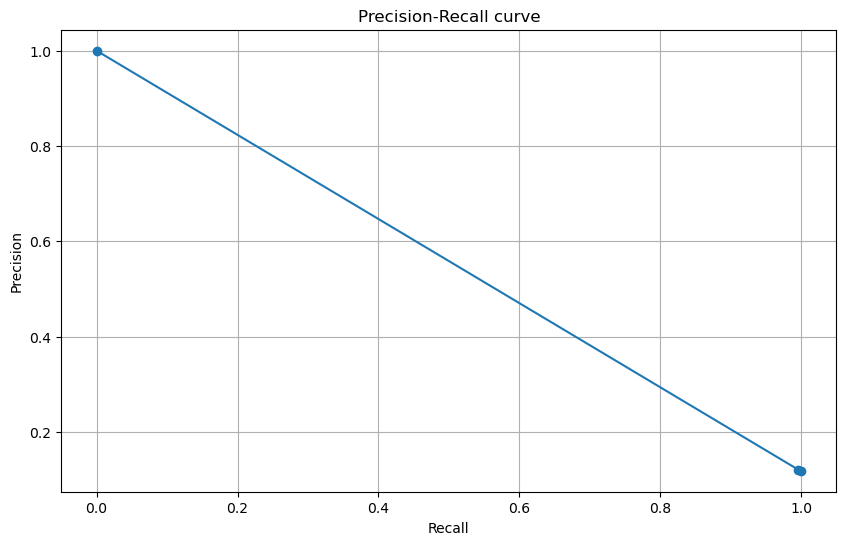

In [23]:
# plot the PR curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(test_data_y, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='o')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

